# Detección de anomalías

La detección de anomalías consiste en descubrir instancias que se salen de los parámetros habituales, en inglés, *outliers*.

Los casos que siguen la norma son los *inliers*.

En este cuaderno vamos a utilizar la librería PyOD que está específicamente diseñada para la detección de *outliers* y cuenta con más de 25 algoritmos diferentes para este cometido.

**Ejemplos de outliers:**

- La selección española de fútbol gana por 7 goles a 0 contra Costa Rica en el mundial de Qatar. En general, cualquier resultado deportivo excepcional.
- Un error en la recogida de datos dice que la superficie de un estudio es de 10000 metros cuadrados.
- Un usuario tiene un determinado patrón de compra y en un momento dado realiza una compra en otro país o de una cuantía mucho más alta de lo habitual. No tiene por qué ser un fraude o un error, lo que sí es seguro es que es un *outlier*.
- Para el departamento de ciberseguridad, un acceso extraño a la red.

## Tipos de outliers

* **Univariado**: Es un valor extremo en una única variable. Por ejemplo, una persona que pesa 200kg.
* **Multivariado**: Combina valores no usuales de, al menos, dos variables. Mirando las variables por separado, puede que no sea evidente que tenemos un *outlier*. Por ejemplo, una persona mide 2 metros y pesa 40kg.

## ¿Por qué hay que detectar los outliers?

* Los *outliers* pueden tener un impacto muy grande en el modelo.

<img src="https://drive.google.com/uc?id=1CdWbC2qyK_y4BcaTnA1na8bz-_aStHiE">

* Pueden ser los datos más importantes del dataset. Por ejemplo, en la detección de un uso fraudulento de la tarketa de crédito o en un experimento científico: mueren 100 ratas y sobrevive una, merece la pena investigar a esa rata.

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pandas
from scipy import stats

In [4]:
# Importamos los modelos de los algoritmos Angle-Based Outlier Detection y k-Nearest Neightbours Detections

from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [6]:
from pyod.utils.data import generate_data

#Generamos datos aleatorios con dos atributos y un porcentaje de outliers del 8%
X_train, y_train = generate_data(n_train=200, train_only=True, n_features=2, contamination=0.08)

In [7]:
X_train 

array([[ 4.08574494,  3.77115419],
       [ 3.68126303,  3.9374469 ],
       [ 4.01446552,  4.36203255],
       [ 3.99311596,  4.51731131],
       [ 4.2881842 ,  3.76535302],
       [ 3.80230349,  4.12602647],
       [ 3.9764907 ,  3.86858045],
       [ 4.37676943,  4.39362825],
       [ 4.02107198,  3.9903293 ],
       [ 4.09398482,  3.98703498],
       [ 4.00626371,  4.03715999],
       [ 4.18660033,  3.95014606],
       [ 3.97999483,  3.92205599],
       [ 3.66687396,  4.06482929],
       [ 3.8619582 ,  3.36716522],
       [ 3.82957859,  3.40422891],
       [ 4.11081421,  4.03589602],
       [ 3.5967122 ,  4.20451198],
       [ 4.38775878,  3.81717193],
       [ 4.31248761,  3.65418446],
       [ 4.15672896,  4.03054235],
       [ 3.92450403,  3.70975735],
       [ 3.89203067,  4.13470975],
       [ 4.3772892 ,  4.16276103],
       [ 3.97978343,  3.88784241],
       [ 3.69402662,  3.74752009],
       [ 3.7367525 ,  4.0220678 ],
       [ 4.45816981,  3.76294993],
       [ 4.32363618,

In [ ]:
y_train # Muestra los valores que son outliers de forma booleana, si es 0 es un inliner

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
# X es una matriz de puntos (x, y) 
# Para la representación gráfica de los puntos necesitamos sacar las x y las y a vectores diferentes

features_1 = X_train[:, 0]
features_2 = X_train[:, 1]

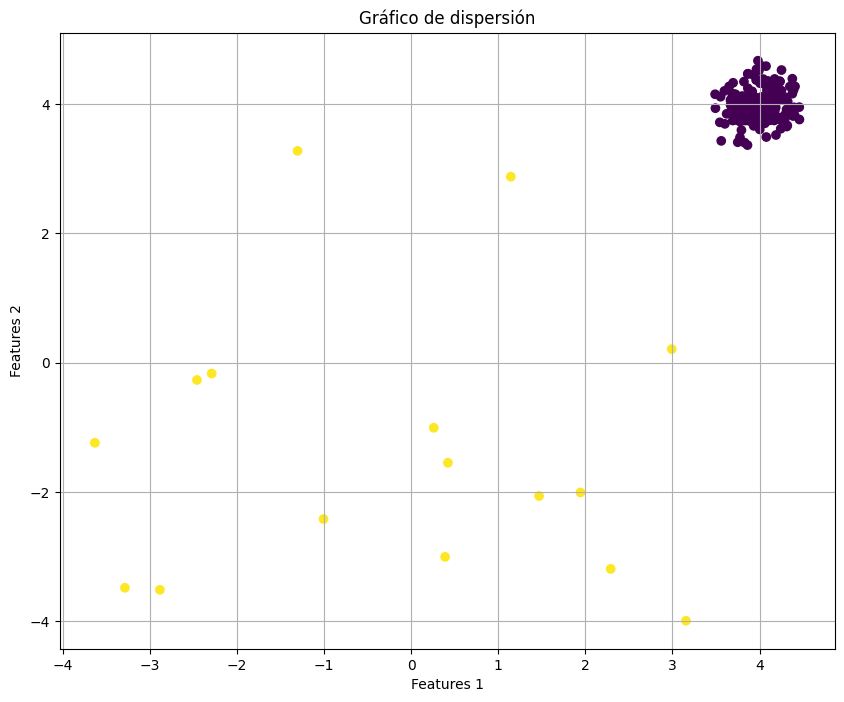

In [22]:
plt.figure(figsize=(10, 8))
plt.grid(visible=True)
plt.scatter(feature_1, feature_2, c=y_train)
plt.title("Gráfico de dispersión")
plt.xlabel("Features 1")
plt.ylabel("Features 2")
plt.show()

In [23]:
# Extraemos los outliers y los inliers

from pyod.utils.data import get_outliers_inliers

X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)

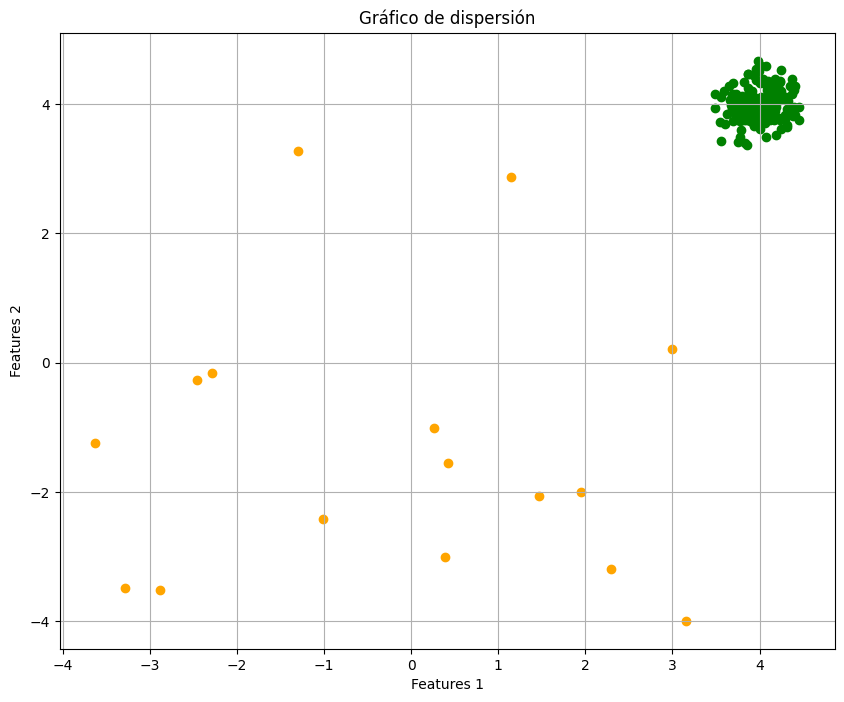

In [24]:
# Mostramos una gráfica donde se muestren los outliers y los inliers de color diferente

plt.figure(figsize=(10, 8))
plt.grid(visible=True)
plt.title("Gráfico de dispersión")
plt.xlabel("Features 1")
plt.ylabel("Features 2")

plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="orange")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c="green")

plt.show()